# Visualize LDSDA pathways

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

visualize_dsda function is part of the dsda_functions.py module. It is used to visualize the LDSDA pathways. The function takes as input the LDSDA pathways and the name of the output file. The output file is a pdf file that contains the LDSDA pathways.

In [10]:
def visualize_dsda(
    route: list = [],
    k_values: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    k: str = '?',
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    X1, X2 = feas_x, feas_y
    cm = plt.colormaps.get_cmap('viridis_r')
    sc = plt.scatter(X1, X2, s=80, c=objs, cmap=cm)

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    def drawArrow(A, B):
        plt.arrow(
            A[0],
            A[1],
            B[0] - A[0],
            B[1] - A[1],
            width=0.00005,
            head_width=0.15,
            head_length=0.08,
            color='black',
            shape='full',
        )

    for i in range(len(route) - 1):
        drawArrow(route[i], route[i + 1])
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)
    title_string = 'D-SDA with k = ' + k
    plt.title(title_string)
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    plt.legend(['Invalid', 'Evaluated Infeasible', 'Route'])
    plt.show()

Read the data from the file. Using Pandas, we read the data from the file and store it in a dataframe. The dataframe contains the the complete enumerations of the LDSDA lattice.

In [11]:
df = pd.read_csv('compl_enum_column_17_baron.csv')
# df = pd.read_csv('compl_enum_column_17_knitro.csv')

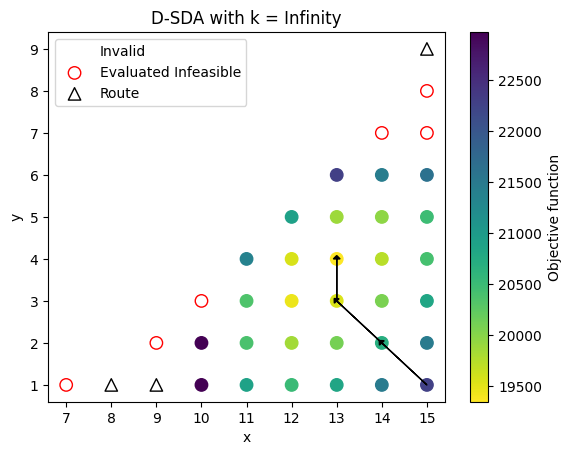

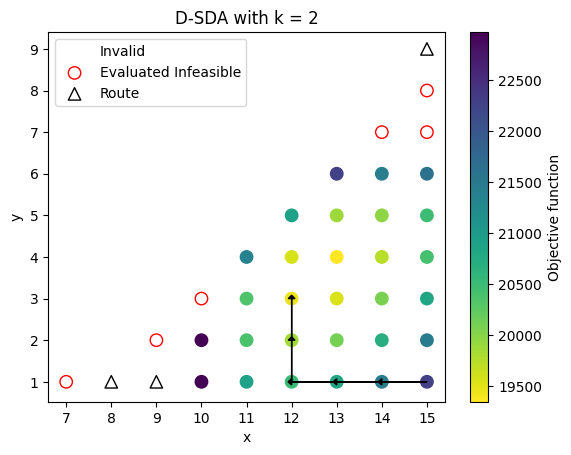

In [12]:
# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route1 = [(15, 1), (14, 2), (13, 3), (13, 4)]
route2 = [(15, 1), (14, 1), (13, 1), (12, 1), (12, 2), (12, 3)]

# Visualize using the provided function
visualize_dsda(route=route1, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='Infinity', ext1_name='x', ext2_name='y')
visualize_dsda(route=route2, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='2', ext1_name='x', ext2_name='y')

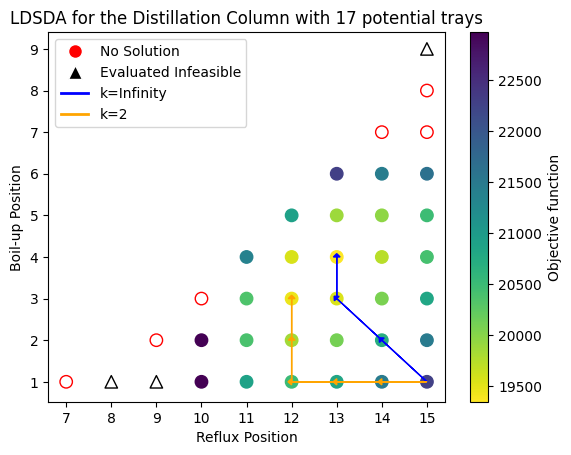

In [8]:
def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LDSDA for the Distillation Column with 17 potential trays')
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_column_17_baron.csv')

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Reflux Position', ext2_name='Boil-up Position')